In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Directory where images are stored
base_dir = 'cat_v1'  # Update path ke dataset lokal
image_size = (224, 224)
batch_size = 32

# Mempersiapkan data dengan augmentasi
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Membuat generator untuk pelatihan, validasi, dan pengujian
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

# Load MobileNetV2 model with weights pre-trained on ImageNet
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

# Add custom top layers
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with early stopping
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

# Save the trained model
model.save('mobilenetv2_cat_breed_classification_model.keras')

Found 1739 images belonging to 11 classes.
Found 428 images belonging to 11 classes.


C:\Users\cryin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.3756 - loss: 1.8221 - val_accuracy: 0.6822 - val_loss: 0.9551
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 51s 929ms/step - accuracy: 0.7271 - loss: 0.8079 - val_accuracy: 0.7033 - val_loss: 0.8010
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 49s 891ms/step - accuracy: 0.7624 - loss: 0.6924 - val_accuracy: 0.7710 - val_loss: 0.7312
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 49s 894ms/step - accuracy: 0.7703 - loss: 0.6476 - val_accuracy: 0.7407 - val_loss: 0.7788
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 51s 922ms/step - accuracy: 0.8115 - loss: 0.5314 - val_accuracy: 0.7617 - val_loss: 0.7381
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 51s 932ms/step - accuracy: 0.8382 - loss: 0.4609 - val_accuracy: 0.7313 - val_loss: 0.8405
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 50s 919ms/step - accuracy: 0.8333 - loss: 0.4702 - val_accuracy: 0.7921 - val_loss: 0.7050
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 49s 892ms/step - accuracy: 0.8456 - loss: 0.4299 - val

In [4]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,803,683 (10.70 MB)

 Trainable params: 181,899 (710.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 363,800 (1.39 MB)

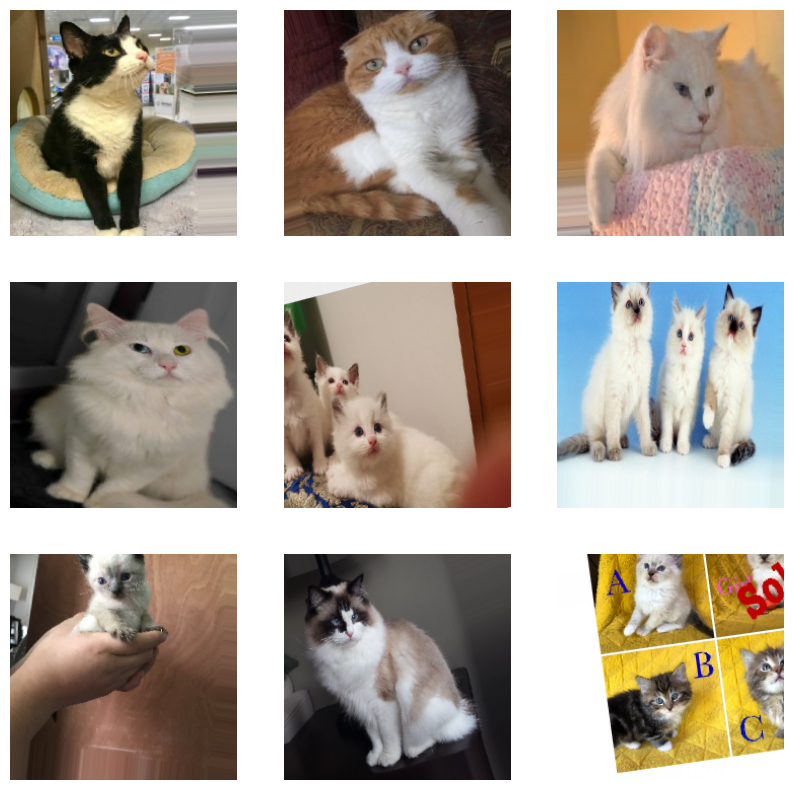

In [5]:
images, labels = next(train_generator)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

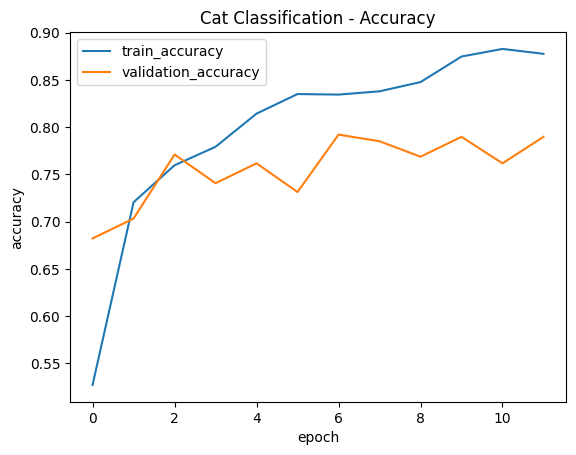

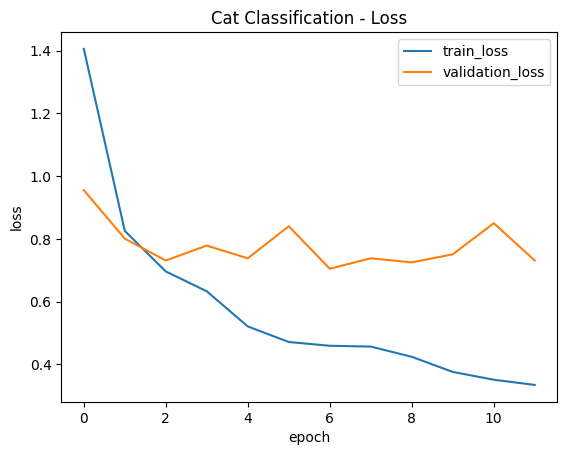

In [6]:
def plot_accuracy(history, title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()

def plot_loss(history, title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

# Memvisualisasikan grafik akurasi dan loss dari history pelatihan model
plot_accuracy(history, 'Cat Classification - Accuracy')
plot_loss(history, 'Cat Classification - Loss')

In [7]:
# Langkah 1: Menggunakan data validasi penuh untuk evaluasi
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    subset='validation',
    shuffle=False  # Jangan acak agar urutan data tetap untuk evaluasi
)

# Memuat model yang sudah disimpan
model = load_model('mobilenetv2_cat_breed_classification_model.keras')

# Melakukan prediksi pada seluruh data validasi
val_steps = validation_generator.samples // batch_size + 1
predictions = model.predict(validation_generator, steps=val_steps)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = validation_generator.classes

# Cek jumlah kelas pada data validasi
num_classes_val = len(np.unique(true_labels))
print(f"Jumlah kelas pada data validasi: {num_classes_val}")

# Mengambil nama kelas dari generator
class_names = list(validation_generator.class_indices.keys())
print(f"Jumlah kelas yang terbaca oleh validation_generator: {len(class_names)}")

# hitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Akurasi model: {accuracy * 100:.2f}%')

# Menghitung classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Menampilkan seluruh baris pada dataframe
pd.set_option('display.max_rows', None)

# Menampilkan classification report dalam bentuk tabel
print("Classification Report:")
print(df_report)

Found 428 images belonging to 11 classes.
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 709ms/step
Jumlah kelas pada data validasi: 11
Jumlah kelas yang terbaca oleh validation_generator: 11
Akurasi model: 76.40%
Classification Report:
                    precision    recall  f1-score     support
abyssinian           0.857143  0.810811  0.833333   37.000000
angora               0.769231  0.512821  0.615385   39.000000
bengal               0.848485  0.800000  0.823529   35.000000
domestic_shorthair   0.900000  0.529412  0.666667   34.000000
maine_coon           0.870968  0.729730  0.794118   37.000000
persian              0.596774  0.840909  0.698113   44.000000
ragdoll              0.677966  0.975610  0.800000   41.000000
scottish_fold        0.676471  0.605263  0.638889   38.000000
siamese              0.795455  0.853659  0.823529   41.000000
sphynx               0.894737  0.829268  0.860759   41.000000
tuxedo               0.760870  0.853659  0.804598   41.000000
accuracy             0.764019  0.76

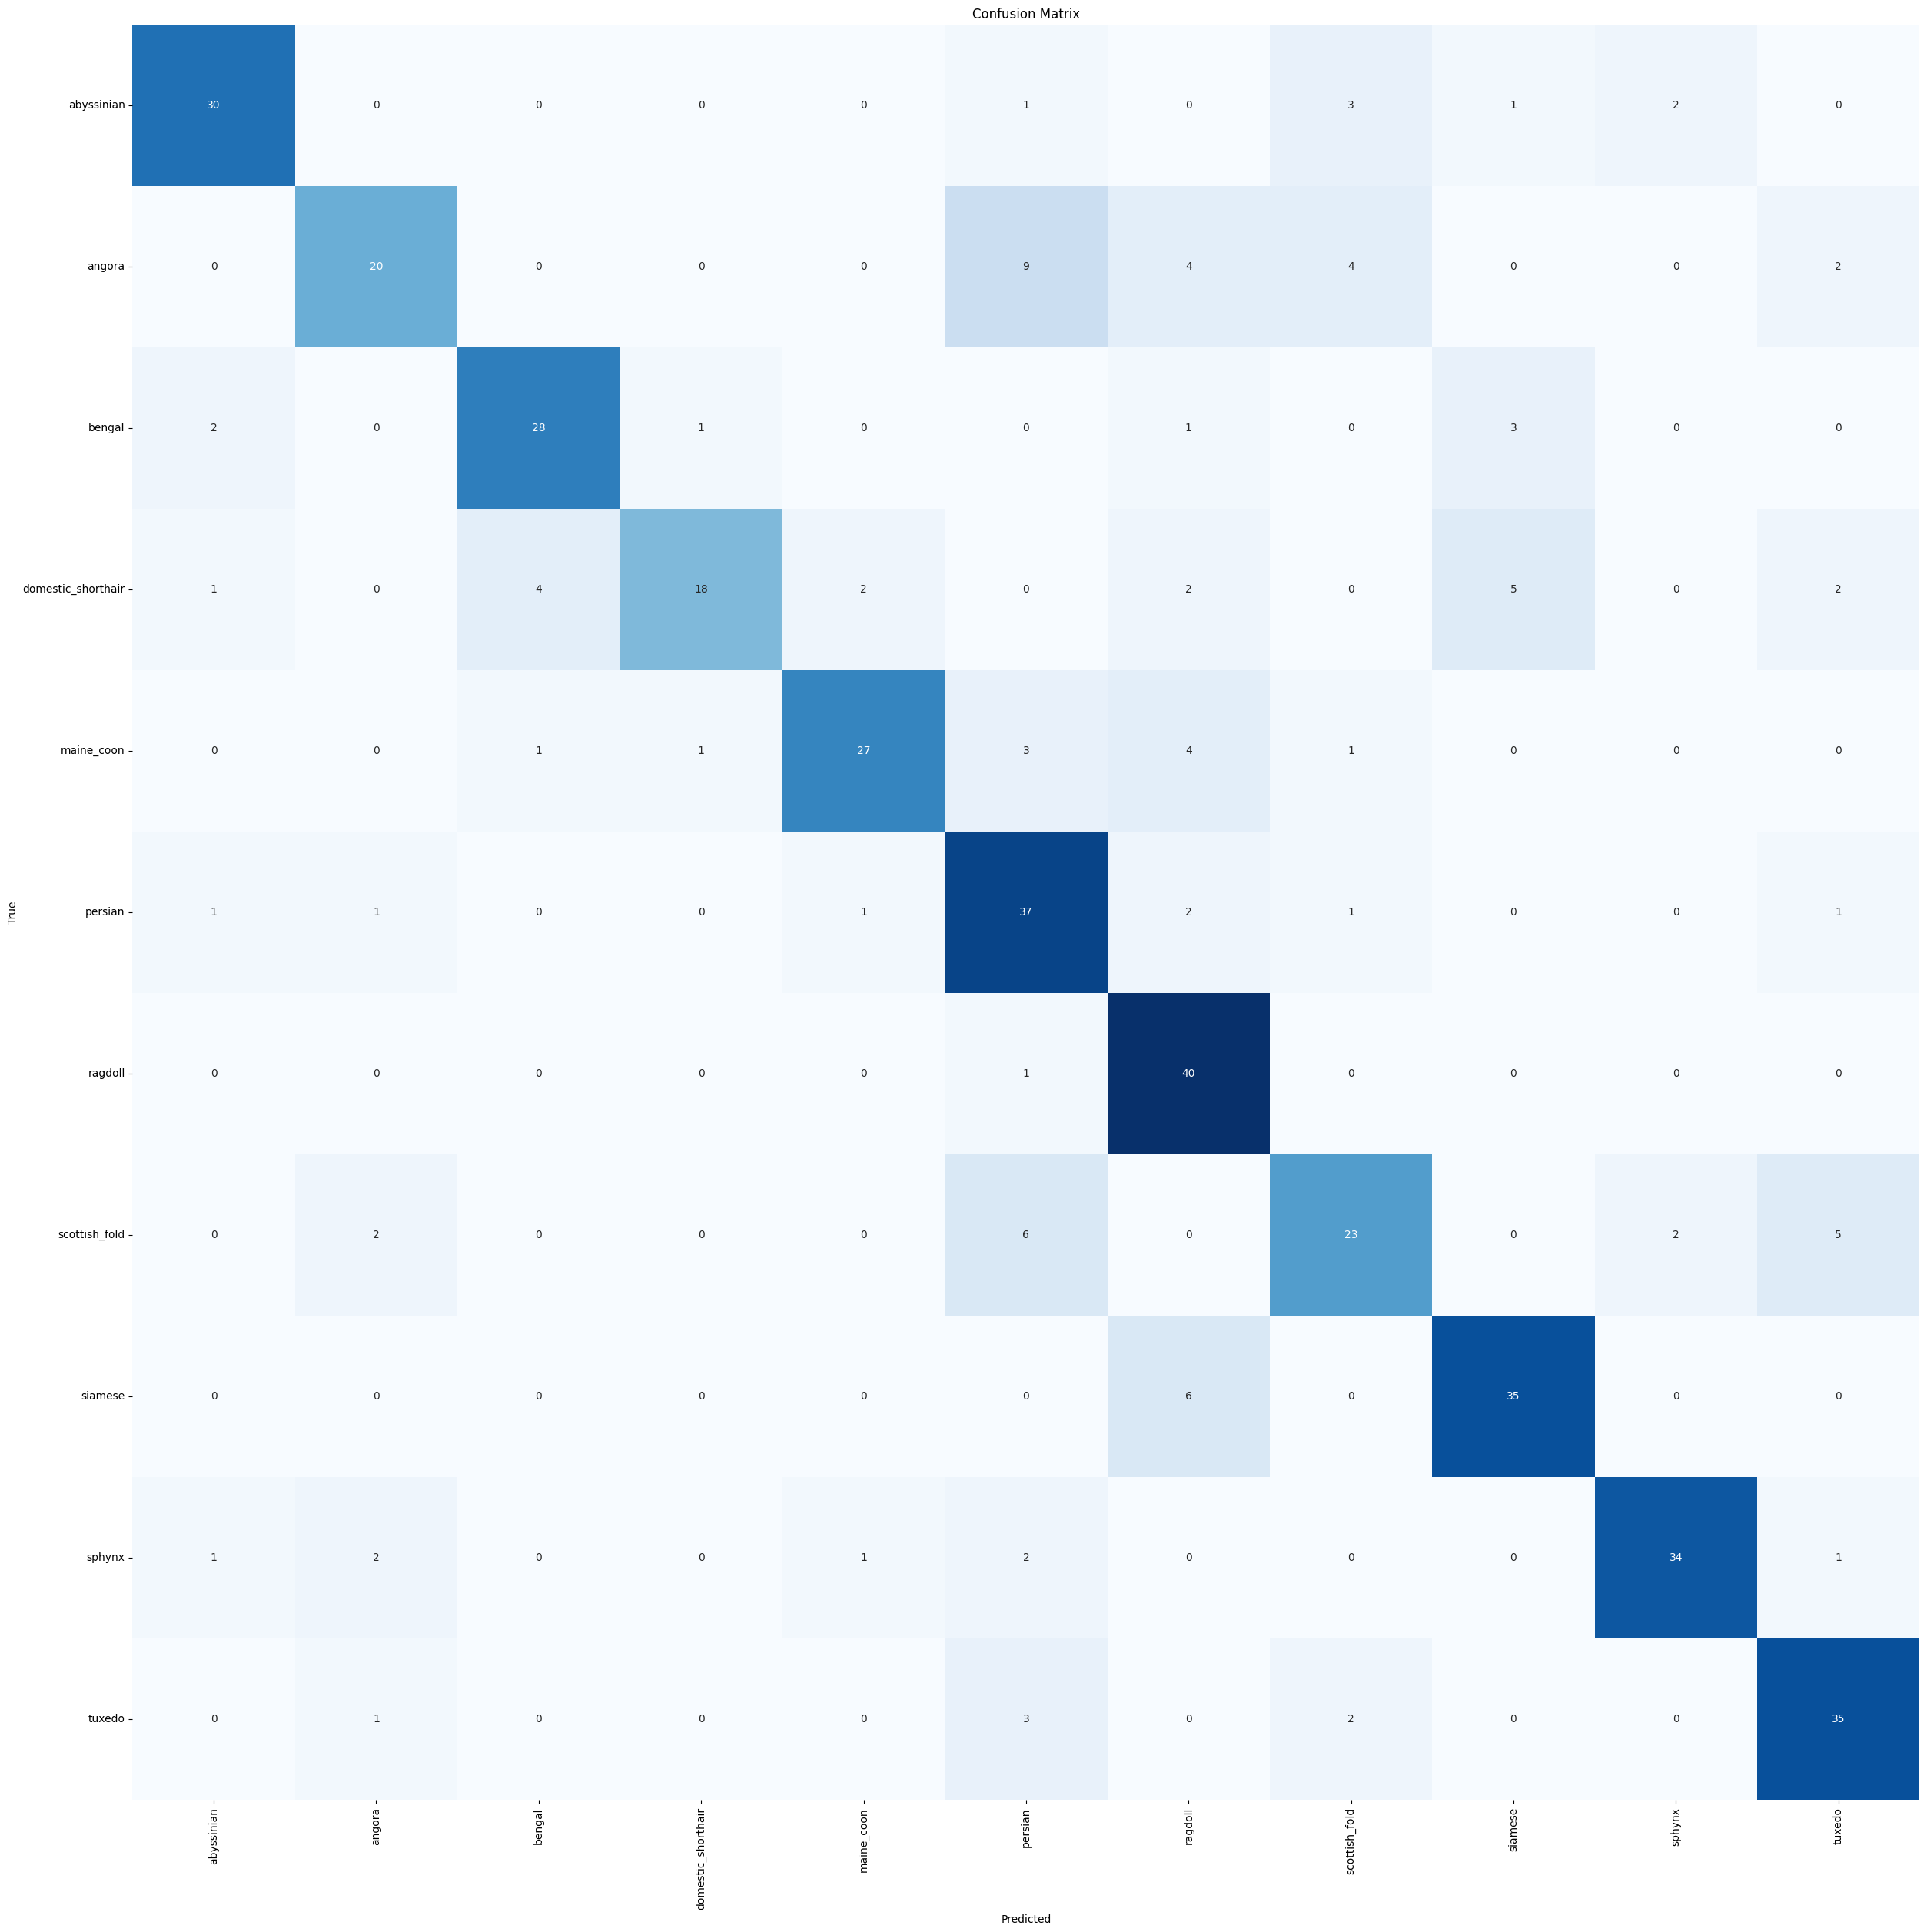

In [8]:
# Menghitung confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as np 
from sklearn.metrics import accuracy_score 
model = tf.keras.models.load_model('mobilenetv2_cat_breed_classification_model.keras') 
base_dir = 'cat_v1'  
image_size = (224, 224) 
batch_size = 32 
test_datagen = ImageDataGenerator(rescale=1./255, 
validation_split=0.2) 
test_generator = test_datagen.flow_from_directory( 
base_dir, 
target_size=image_size, 
batch_size=batch_size, 
subset='validation', 
class_mode='categorical', 
shuffle=False 
) 
predictions = model.predict(test_generator, verbose=1) 
y_true = test_generator.classes 
y_pred = np.argmax(predictions, axis=1) 
accuracy = accuracy_score(y_true, y_pred) 
print(f'Akurasi Model: {accuracy:.2f}') 

SyntaxError: invalid syntax (769181114.py, line 5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


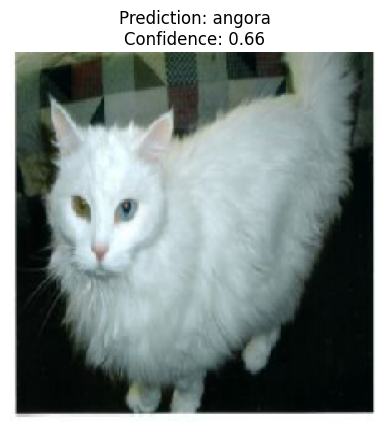

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model('mobilenetv2_cat_breed_classification_model.keras')

# Replace this with your actual class labels
class_labels = [
    'abyssinian', 'angora', 'bengal', 'domestic_shorthair', 'maine_coon', 'persian', 
    'ragdoll', 'scottish_fold', 'siamese', 'sphynx', 'tuxedo'
]

def predict_image(img_path):
    # Load the image and preprocess it
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale the image

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence_score = predictions[0][predicted_class]

    # Get the label of the predicted class
    predicted_label = class_labels[predicted_class]

    # Plot the image
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence_score:.2f}")
    plt.axis('off')
    plt.show()

# Replace this with the path to the image you want to classify
img_path = 'cat_v1/angora/23168919_2224.jpg'
predict_image(img_path)
